# Analizando Datos de Twitter con Python

## ¿Qué aprenderé en este taller?
### 1. Aprender qué es una API
### 2. Aprender a utilizar la API de Twitter y la de un analizador de sentimiento
### 3. Aprender suficiente Python para hacer cosas chidas


## Pasos
### 1. Crear una cuenta de desarrollador en [developer.twitter.com](developer.twitter.com) y esperar a que te validen
### 2. Crear un app en [developer.twitter.com](developer.twitter.com)

# ¿Qué es una API?
## Application Programming Interface


> Básicamente es una puerta abierta hacia algún recurso.  
> Algunas plataformas utilizan API's para ofrecer servicios relacionados a su plataforma.  
> Aquí pueden encontrar API's de casi cualquier cosa https://rapidapi.com/


![alt text](https://www.flimper.com/hubfs/como-crear-una-api.jpg)

# Tweepy
---
### Es una biblioteca de Python que facilita la comunicación con Twitter
![alt text](https://s3.amazonaws.com/com.twilio.prod.twilio-docs/images/twitter-python-logos.width-808.jpg)

In [0]:
import tweepy

## Aquí autenticamos que somos los dueños de la aplicación.

In [0]:
####input your credentials here
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [0]:
first_query = api.search(q="xbox", count=100)
second_query = api.search(q="ps4", count=100)

In [0]:
first_query_length = len(first_query)
second_query_length = len(second_query)
print(first_query_length , second_query_length)

90 88


In [0]:
first_query

In [0]:
second_query

In [0]:
first_query[10].text

'@SparckMc Sparckl,cambiando de tema cuánto le calculas en cuanto en precio de Gears 5 la ultímate edition,esque aho… https://t.co/TXFF87WPBv'

In [0]:
first_query[14].user

User(_api=<tweepy.api.API object at 0x7fd8de335c18>, _json={'id': 898339615899136001, 'id_str': '898339615899136001', 'name': 'Xbox_Sanmans', 'screen_name': 'Xbox_Sanmans', 'location': '165.3°E ~ 14.7°W', 'description': 'Former Microsoft+Avid+Softimage 3D+Unisys+Commvault+SCIF+DoD Federal Police Officer. Xbox Ambassador. Disaster Recov 4 Adobe Fujitsu Blizzard Game Film insider', 'url': 'https://t.co/bKAiMbDn2p', 'entities': {'url': {'urls': [{'url': 'https://t.co/bKAiMbDn2p', 'expanded_url': 'https://twitter.com/MS_InSider', 'display_url': 'twitter.com/MS_InSider', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 151, 'friends_count': 406, 'listed_count': 1, 'created_at': 'Fri Aug 18 00:23:49 +0000 2017', 'favourites_count': 1321, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 1055, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_

In [0]:
first_query[14].user.description

'Former Microsoft+Avid+Softimage 3D+Unisys+Commvault+SCIF+DoD Federal Police Officer. Xbox Ambassador. Disaster Recov 4 Adobe Fujitsu Blizzard Game Film insider'



# Estructura básica de Objeto Status


```
{
 "created_at":"Thu Apr 06 15:24:15 +0000 2017",
 "id": 850006245121695744,
 "id_str": "850006245121695744",
 "text": "1/ Today we’re sharing our vision for the future of the Twitter API platform!nhttps://t.co/XweGngmxlP",
 "user": {},  
 "entities": {}
}
```

## Pueden encontrar más información en [este link](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/intro-to-tweet-json)





## Documentación de repustate [aquí](https://www.repustate.com/docs/#toc-auth)

In [0]:
!pip install repustate

## Score es un valor de -1 a 1 en donde -1 es sentimiento negativo y 1 es sentimiento positivo

In [0]:
from repustate import Client
client = Client(api_key='', version='v4')

In [0]:
client.sentiment("Es un pésimo día para correr", lang='es')

{'score': -0.9669632681220451, 'status': 'OK'}

In [0]:
scores = []
for tweet in first_query:
  score = client.sentiment(tweet.text, lang='es')
  scores.append(score)

In [0]:
scores

In [0]:
scores_list = [score['score'] for score in scores]
scores_list

In [0]:
import seaborn as sns
from numpy import array
scores_array = array(scores_list)
sns.set()
ax = sns.distplot(scores_array)

In [0]:
# lang='es'

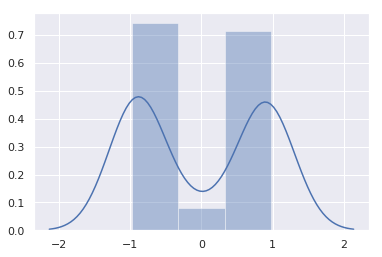

In [0]:
new_scores_list = []
for score in scores_list:
  if score == 0:
    pass
  else:
    new_scores_list.append(score)
    
scores_array = array(new_scores_list)
sns.set()
ax = sns.distplot(scores_array)

In [0]:
import statistics as stats

average_score = stats.mean(new_scores_list)

print(average_score)

-0.013748539962315712


In [0]:
def show_tweet_stats(tweets):
  scores = []
  for tweet in tweets:
    score = client.sentiment(tweet.text, lang='es')
    scores.append(score)
   
  scores_list = [score['score'] for score in scores]
  clean_scores_list = []
  for score in scores_list:
    if score == 0:
      pass
    else:
      clean_scores_list.append(score)
      
  scores_array = array(clean_scores_list)
  sns.set()
  ax = sns.distplot(scores_array)
  
  average_score = stats.mean(clean_scores_list)
  print(f'Average Score: {average_score}')

Ingresa primer termino> bedu
Ingresa segundo termino> ironhack
Average Score: 0.5199251852195266


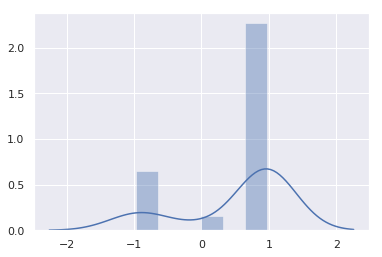

In [0]:
first_query_string = input("Ingresa primer termino> ")
second_query_string = input("Ingresa segundo termino> ")
first_query = api.search(q=first_query_string, count=100, lang='es')
second_query = api.search(q=second_query_string, count=100, lang='es')
show_tweet_stats(first_query)

Average Score: 0.4931100495366555


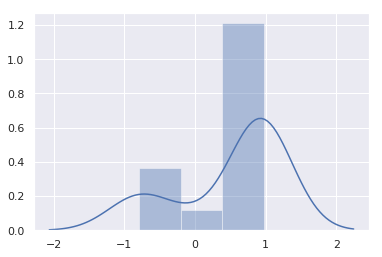

In [0]:
show_tweet_stats(second_query)